In [315]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv(r'Data\Sport car price.csv')

In [316]:
pd.set_option('display.max_rows', None)

In [317]:
df.isna().sum()

Car Make                    0
Car Model                   0
Year                        0
Engine Size (L)            10
Horsepower                  0
Torque (lb-ft)              3
0-60 MPH Time (seconds)     0
Price (in USD)              0
dtype: int64

In [318]:
#finding rows with null values
df[df.isna().any(axis=1)]

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
168,Rimac,C_Two,2022,NaN,1914,1696,1.9,"2,400,000"
171,Tesla,Model S Plaid,2021,NaN,1020,1050,1.98,"131,190"
222,Porsche,Taycan Turbo S,2021,NaN,750,774,2.6,"185,000"
247,Tesla,Model S Plaid,2022,NaN,1020,1050,1.9,"131,190"
387,Rimac,C_Two,2022,NaN,1888,1696,1.8,"2,400,000"
389,Tesla,Roadster,2022,NaN,10000+,0,1.9,"200,000"
642,Tesla,Model S Plaid,2021,Electric,1020,NaN,1.9,"139,990"
686,Rimac,C_Two,2022,NaN,1914,1696,1.85,"2,400,000"
697,Lotus,Evija,2022,NaN,1972,1254,2.5,"2,700,000"
752,Porsche,Taycan,2022,NaN,469,479,3.8,"79,900"


### Dropping rows where Engine Size and Torque is NaN.

In [319]:
df=df.dropna(subset=['Engine Size (L)','Torque (lb-ft)'])

In [320]:
df.isna().sum()

Car Make                   0
Car Model                  0
Year                       0
Engine Size (L)            0
Horsepower                 0
Torque (lb-ft)             0
0-60 MPH Time (seconds)    0
Price (in USD)             0
dtype: int64

### Dropping all electric and Hybrid cars

In [321]:
df = df.loc[~df['Engine Size (L)'].str.contains('Electric|Hybrid')]

### replaceing all commas, + and - for easier datatype conversions

In [322]:
df['Horsepower'] = df['Horsepower'].str.replace('[+,-,]', '')
df['Torque (lb-ft)'] = df['Torque (lb-ft)'].str.replace('[+,-,]', '')
df['Price (in USD)'] = df['Price (in USD)'].str.replace('[+,-,]', '')

C:\Users\edwar\AppData\Local\Temp\ipykernel_4728\1704719958.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Horsepower'] = df['Horsepower'].str.replace('[+,-,]', '')
C:\Users\edwar\AppData\Local\Temp\ipykernel_4728\1704719958.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Torque (lb-ft)'] = df['Torque (lb-ft)'].str.replace('[+,-,]', '')
C:\Users\edwar\AppData\Local\Temp\ipykernel_4728\1704719958.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Price (in USD)'] = df['Price (in USD)'].str.replace('[+,-,]', '')


In [323]:
df =df.drop(index=335) #torque value is missing. dropping that row

In [324]:
df.shape

(948, 8)

### Changing Datatypes of columns

In [325]:
df = df.astype({'Engine Size (L)':'float','Horsepower': 'int64', 'Torque (lb-ft)': 'int64', '0-60 MPH Time (seconds)': 'float', 'Price (in USD)': 'int64'})

In [326]:
df.dtypes #sanity check

Car Make                    object
Car Model                   object
Year                         int64
Engine Size (L)            float64
Horsepower                   int64
Torque (lb-ft)               int64
0-60 MPH Time (seconds)    float64
Price (in USD)               int64
dtype: object

### convert Dollars to $1000s

In [327]:
df['Price (in USD $1000)'] = df['Price (in USD)'] / 1000
df = df.drop(columns='Price (in USD)')

### initial data-analysis and visualizations

In [328]:
df[['Engine Size (L)', 'Horsepower', 'Torque (lb-ft)', '0-60 MPH Time (seconds)', 'Price (in USD $1000)']].describe()

,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD $1000)
count,948.000000,948.000000,948.000000,948.000000,948.000000
mean,4.395781,603.325949,519.694093,3.586920,342.768959
std,1.398801,382.482684,285.783466,0.724134,690.903793
min,0.000000,181.000000,151.000000,1.900000,25.000000
25%,3.500000,454.000000,398.000000,3.000000,70.471250
50%,4.000000,583.000000,505.000000,3.500000,121.750000
75%,5.200000,660.000000,590.000000,4.000000,240.250000
max,8.400000,10000.000000,7376.000000,6.500000,5200.000000


In [329]:
#Drop outlier of horsepower >2000, Torque >2000
indexAge = df[ (df['Horsepower'] > 2000) | (df['Torque (lb-ft)'] > 2000) ].index
df.drop(indexAge , inplace=True)

In [330]:
df.shape

(947, 8)

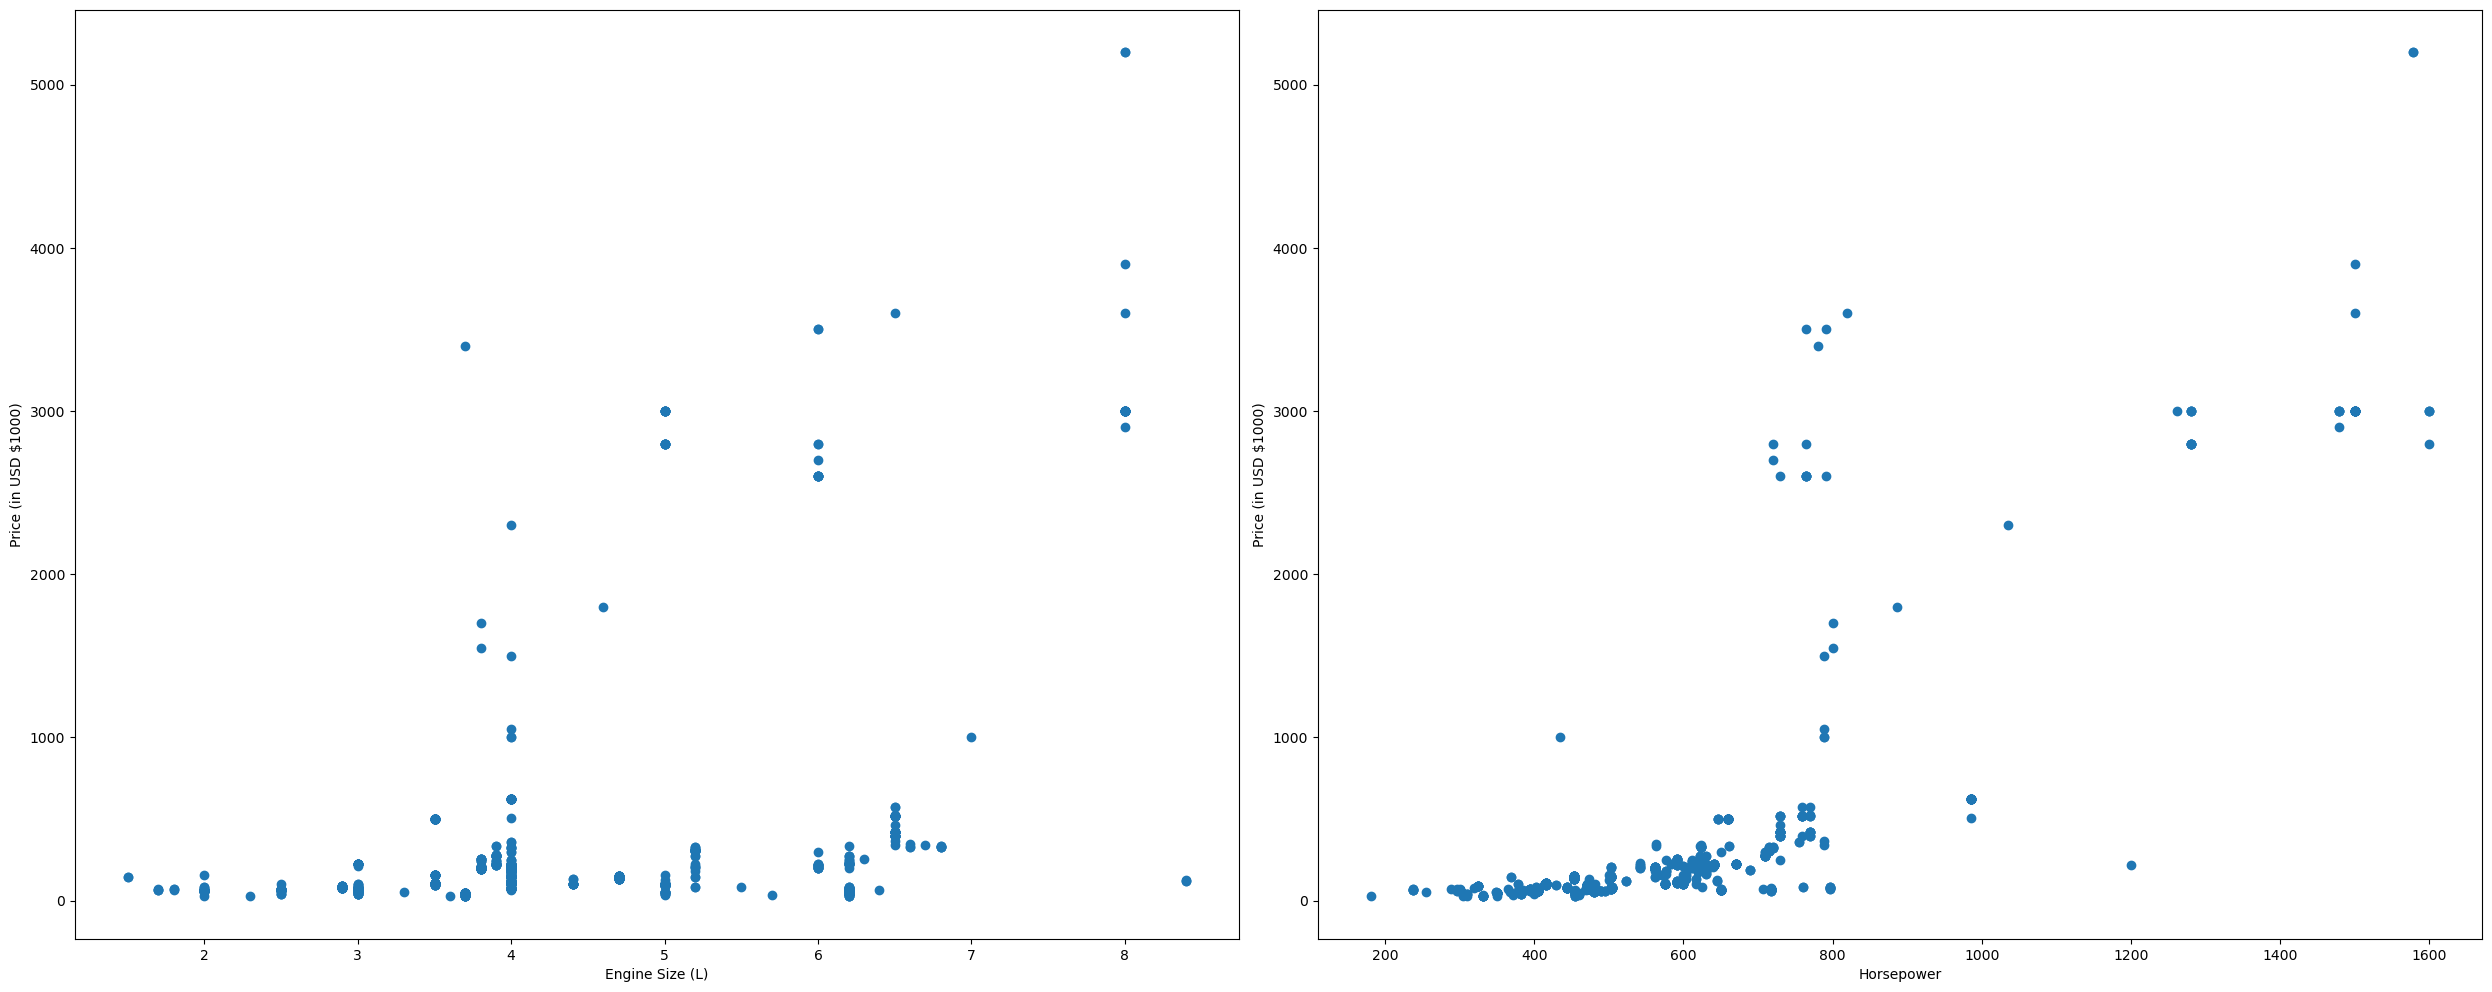

In [331]:
y = df['Price (in USD $1000)']
fig, ax = plt.subplots(1,2, figsize = (25,10))
ax[0].scatter(df['Engine Size (L)'], y)
ax[0].set_xlabel('Engine Size (L)')
ax[0].set_ylabel('Price (in USD $1000)')
ax[1].scatter(df['Horsepower'], y)
ax[1].set_xlabel('Horsepower')
ax[1].set_ylabel('Price (in USD $1000)')

fig.tight_layout(pad=1)
plt.show()

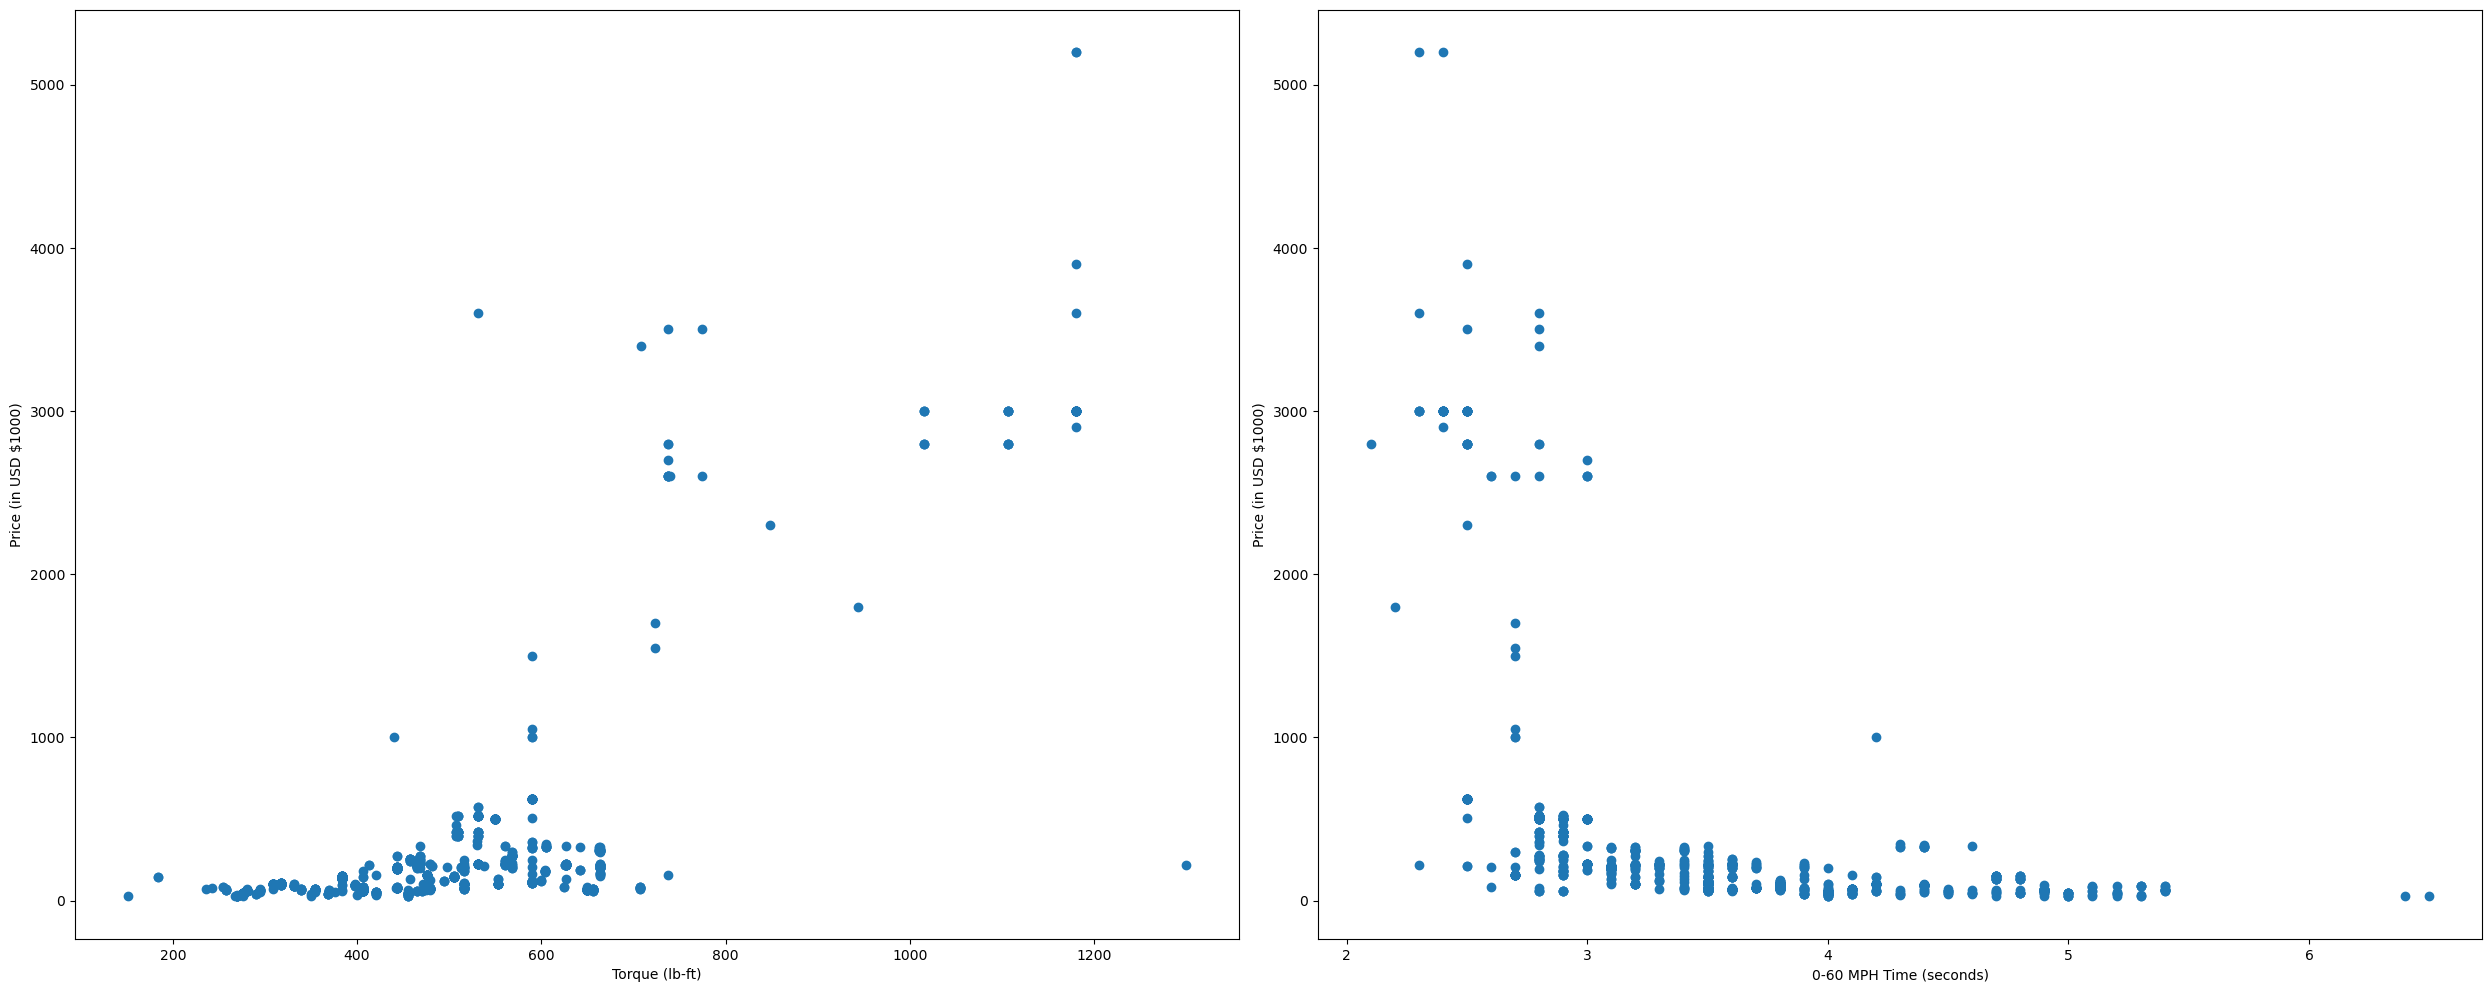

In [332]:
y = df['Price (in USD $1000)']
fig, ax = plt.subplots(1,2, figsize = (25,10))
ax[0].scatter(df['Torque (lb-ft)'], y)
ax[0].set_xlabel('Torque (lb-ft)')
ax[0].set_ylabel('Price (in USD $1000)')
ax[1].scatter(df['0-60 MPH Time (seconds)'], y)
ax[1].set_xlabel('0-60 MPH Time (seconds)')
ax[1].set_ylabel('Price (in USD $1000)')
fig.tight_layout(pad=1)
plt.show()

# Decision Tree ML

In [333]:
df.head()

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD $1000)
0,Porsche,911,2022,3.0,379,331,4.0,101.20
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,274.39
2,Ferrari,488 GTB,2022,3.9,661,561,3.0,333.75
3,Audi,R8,2022,5.2,562,406,3.2,142.70
4,McLaren,720S,2021,4.0,710,568,2.7,298.00


In [334]:
X_hp= df['Horsepower'].values.reshape(-1,1) #features
y= df.values[:,7:] #target/Price
X_train, X_test, y_train, y_test = train_test_split(X_hp,y, random_state=42)


In [335]:
X_test.shape, y_test.shape, X_train.shape, y_train.shape

((237, 1), (237, 1), (710, 1), (710, 1))

In [336]:
regr = DecisionTreeRegressor(random_state=0)
regr.fit(X_train, y_train) #fit the train model

DecisionTreeRegressor(random_state=0)

In [337]:
print(f'levels of depth: {regr.get_depth()}')

levels of depth: 14


In [338]:
print(f'Train score: {regr.score(X_train, y_train)} ,Test score: {regr.score(X_test, y_test)}')

Train score: 0.959220370027958 ,Test score: 0.9699616777835356


In [339]:
y_predict = regr.predict(X_test)

In [340]:
#df comparing test vs predict
df_result = pd.DataFrame({'test_prices ($1000)':y_test.reshape(-1), 'predict_prices ($1000)':y_predict.reshape(-1)})
df_result.head(5)

,test_prices ($1000),predict_prices ($1000)
0,3599.0,3069.076923
1,59.9,61.806667
2,44.0,41.537778
3,92.95,93.310000
4,210.0,218.641667


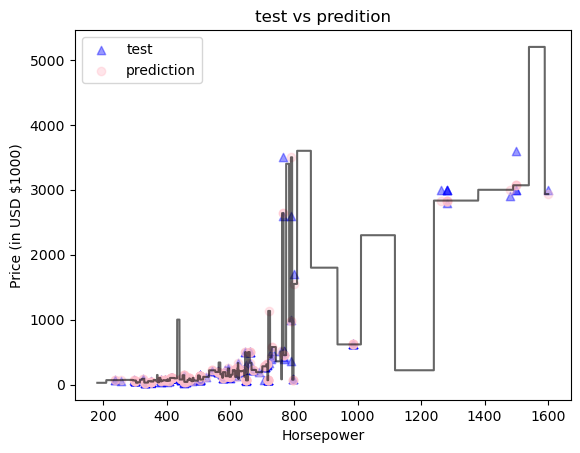

In [341]:
plt.scatter(X_test, y_test, color = 'blue', marker='^', alpha=0.4)
plt.scatter(X_test, y_predict, color = 'pink', marker='o', alpha=0.4)
plt.title('test vs predition')
plt.xlabel('Horsepower')
plt.ylabel('Price (in USD $1000)')
X_grid = np.arange(min(X_hp), max(X_hp), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid, regr.predict(X_grid), color = 'black', alpha=0.6)
plt.legend(['test', 'prediction'])
plt.show()

levels of depth: 11
Train score: 0.6078693562518598 ,Test score: 0.47404218268526377


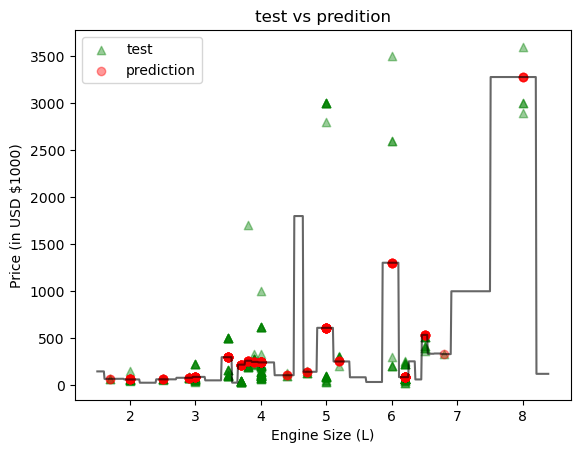

In [342]:
X_es= df['Engine Size (L)'].values.reshape(-1,1) #features
y= df.values[:,7:] #target/Price
X_train, X_test, y_train, y_test = train_test_split(X_es,y, random_state=42)
regr2 = DecisionTreeRegressor(random_state=0)
regr2.fit(X_train, y_train) #fit the train model
print(f'levels of depth: {regr2.get_depth()}')
print(f'Train score: {regr2.score(X_train, y_train)} ,Test score: {regr2.score(X_test, y_test)}')
y_predict = regr2.predict(X_test)
plt.scatter(X_test, y_test, color = 'green', marker='^', alpha=0.4)
plt.scatter(X_test, y_predict, color = 'red', marker='o', alpha=0.4)
plt.title('test vs predition')
plt.xlabel('Engine Size (L)')
plt.ylabel('Price (in USD $1000)')
X_grid = np.arange(min(X_es), max(X_es), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid, regr2.predict(X_grid), color = 'black', alpha=0.6)
plt.legend(['test', 'prediction'])
plt.show()

levels of depth: 11
Train score: 0.9278118742659195 ,Test score: 0.9045724964553818


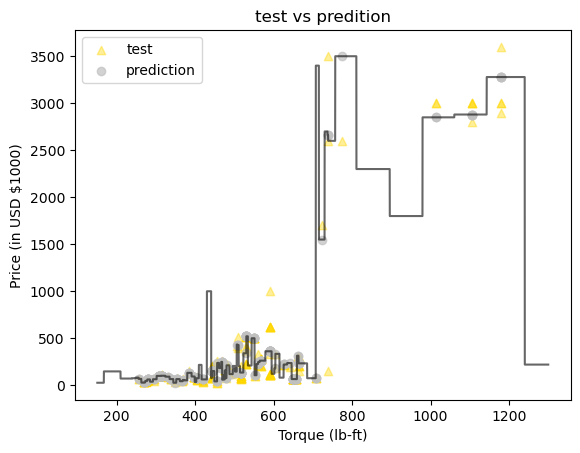

In [348]:
X_tq= df['Torque (lb-ft)'].values.reshape(-1,1) #features
y= df.values[:,7:] #target/Price
X_train, X_test, y_train, y_test = train_test_split(X_tq,y, random_state=42)
regr3 = DecisionTreeRegressor(random_state=0)
regr3.fit(X_train, y_train) #fit the train model
print(f'levels of depth: {regr3.get_depth()}')
print(f'Train score: {regr3.score(X_train, y_train)} ,Test score: {regr3.score(X_test, y_test)}')
y_predict = regr3.predict(X_test)
plt.scatter(X_test, y_test, color = 'gold', marker='^', alpha=0.4)
plt.scatter(X_test, y_predict, color = 'silver', marker='o', alpha=0.7)
plt.title('test vs predition')
plt.xlabel('Torque (lb-ft)')
plt.ylabel('Price (in USD $1000)')
X_grid = np.arange(min(X_tq), max(X_tq), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid, regr3.predict(X_grid), color = 'black', alpha=0.6)
plt.legend(['test', 'prediction'])
plt.show()

levels of depth: 10
Train score: 0.6408858682423868 ,Test score: 0.6370827957649522


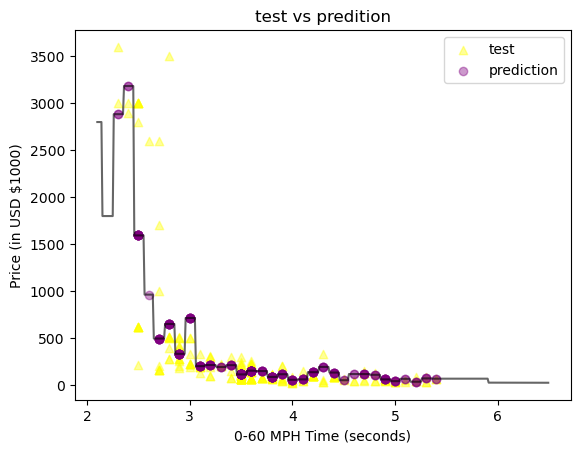

In [346]:
X_zero= df['0-60 MPH Time (seconds)'].values.reshape(-1,1) #features
y= df.values[:,7:] #target/Price
X_train, X_test, y_train, y_test = train_test_split(X_zero,y, random_state=42)
regr4 = DecisionTreeRegressor(random_state=0)
regr4.fit(X_train, y_train) #fit the train model
print(f'levels of depth: {regr4.get_depth()}')
print(f'Train score: {regr4.score(X_train, y_train)} ,Test score: {regr4.score(X_test, y_test)}')
y_predict = regr4.predict(X_test)
plt.scatter(X_test, y_test, color = 'yellow', marker='^', alpha=0.4)
plt.scatter(X_test, y_predict, color = 'purple', marker='o', alpha=0.4)
plt.title('test vs predition')
plt.xlabel('0-60 MPH Time (seconds)')
plt.ylabel('Price (in USD $1000)')
X_grid = np.arange(min(X_zero), max(X_zero), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid, regr4.predict(X_grid), color = 'black', alpha=0.6)
plt.legend(['test', 'prediction'])
plt.show()

In [345]:
print(len(df['Car Make'].value_counts()))

35


# Decision Tree to predict Car Make instead of Price?? There are 35 Total Car Makes.